In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from kerastuner import Hyperband, HyperModel
from tensorflow.keras import layers

In [2]:
dataset = pd.read_csv('data/winequality/winequality-white.csv', delimiter=';')
dataset = dataset.dropna()

train_dataset = dataset.sample(frac=0.8, random_state=0)
val_test_dataset = dataset.drop(train_dataset.index)
val_dataset = val_test_dataset.sample(frac=0.5, random_state=0)
test_dataset = val_test_dataset.drop(val_dataset.index)

train_features = train_dataset.copy()
val_features = val_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('quality')
val_labels = val_features.pop('quality')
test_labels = test_features.pop('quality')

In [3]:
min_value = 20
max_value = 40
step_size = 1

class WideHyperModel(HyperModel):
    def build(self, hp):
        model = tf.keras.Sequential([
            layers.experimental.preprocessing.Normalization(),
            layers.Dense(units=hp.Int(
                'units_1',
                min_value=min_value,
                max_value=max_value,
                step=step_size
            ), activation='relu'),
            layers.Dense(units=hp.Int(
                'units_2',
                min_value=min_value,
                max_value=max_value,
                step=step_size
            ), activation='relu'),
            layers.Dense(1)
        ])

        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float(
                'learning_rate',
                min_value=1e-6,
                max_value=0.01,
                sampling='LOG'
            )),
            loss='mean_squared_error'
        )
        return model

In [4]:
HYPERBAND_MAX_EPOCHS = 200
EXECUTION_PER_TRIAL = 3

hypermodel = WideHyperModel()

tuner = Hyperband(
    hypermodel,
    max_epochs=HYPERBAND_MAX_EPOCHS,
    objective='val_loss',
    seed=42,
    executions_per_trial=EXECUTION_PER_TRIAL,
    directory='hyperband',
    project_name='wide_net'
)

tuner.search_space_summary()

Search space summary
Default search space size: 3
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 40, 'step': 1, 'sampling': None}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 40, 'step': 1, 'sampling': None}
learning_rate (Float)
{'default': 1e-06, 'conditions': [], 'min_value': 1e-06, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [5]:
tuner.search(train_features, train_labels, validation_data=(val_features, val_labels))

Trial 254 Complete [00h 01m 05s]
val_loss: 2.2615623275438943

Best val_loss So Far: 0.4335968891779582
Total elapsed time: 00h 33m 54s
INFO:tensorflow:Oracle triggered exit


In [6]:
best_model = tuner.get_best_models(num_models=1)[0]

In [7]:
best_hps = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_features, train_labels, validation_data=(val_features, val_labels), epochs=200)

Epoch 1/200
123/123 [==============================] - 0s 1ms/step - loss: 63.6209 - val_loss: 0.8082
Epoch 2/200
123/123 [==============================] - 0s 746us/step - loss: 0.8113 - val_loss: 0.5385
Epoch 3/200
123/123 [==============================] - 0s 735us/step - loss: 0.7003 - val_loss: 0.5119
Epoch 4/200
123/123 [==============================] - 0s 760us/step - loss: 0.6866 - val_loss: 0.4861
Epoch 5/200
123/123 [==============================] - 0s 755us/step - loss: 0.6771 - val_loss: 0.4870
Epoch 6/200
123/123 [==============================] - 0s 778us/step - loss: 0.7023 - val_loss: 0.5561
Epoch 7/200
123/123 [==============================] - 0s 776us/step - loss: 0.6760 - val_loss: 0.4972
Epoch 8/200
123/123 [==============================] - 0s 766us/step - loss: 0.6587 - val_loss: 0.8046
Epoch 9/200
123/123 [==============================] - 0s 807us/step - loss: 0.6928 - val_loss: 0.4892
Epoch 10/200
123/123 [==============================] - 0s 825us/step - lo

123/123 [==============================] - 0s 832us/step - loss: 0.5803 - val_loss: 0.4607
Epoch 80/200
123/123 [==============================] - 0s 837us/step - loss: 0.5974 - val_loss: 0.4486
Epoch 81/200
123/123 [==============================] - 0s 823us/step - loss: 0.5754 - val_loss: 0.4774
Epoch 82/200
123/123 [==============================] - 0s 829us/step - loss: 0.5712 - val_loss: 0.4705
Epoch 83/200
123/123 [==============================] - 0s 771us/step - loss: 0.5860 - val_loss: 0.4759
Epoch 84/200
123/123 [==============================] - 0s 798us/step - loss: 0.5971 - val_loss: 0.5203
Epoch 85/200
123/123 [==============================] - 0s 807us/step - loss: 0.6168 - val_loss: 0.4519
Epoch 86/200
123/123 [==============================] - 0s 834us/step - loss: 0.6026 - val_loss: 0.4707
Epoch 87/200
123/123 [==============================] - 0s 809us/step - loss: 0.5784 - val_loss: 0.5665
Epoch 88/200
123/123 [==============================] - 0s 838us/step - loss:

123/123 [==============================] - 0s 871us/step - loss: 0.5548 - val_loss: 0.4600
Epoch 158/200
123/123 [==============================] - 0s 866us/step - loss: 0.5637 - val_loss: 0.4773
Epoch 159/200
123/123 [==============================] - 0s 913us/step - loss: 0.5618 - val_loss: 0.4837
Epoch 160/200
123/123 [==============================] - 0s 811us/step - loss: 0.5604 - val_loss: 0.4988
Epoch 161/200
123/123 [==============================] - 0s 901us/step - loss: 0.5504 - val_loss: 0.4432
Epoch 162/200
123/123 [==============================] - 0s 843us/step - loss: 0.5658 - val_loss: 0.4477
Epoch 163/200
123/123 [==============================] - 0s 939us/step - loss: 0.5544 - val_loss: 0.4525
Epoch 164/200
123/123 [==============================] - 0s 887us/step - loss: 0.5503 - val_loss: 0.4915
Epoch 165/200
123/123 [==============================] - 0s 991us/step - loss: 0.5565 - val_loss: 0.4488
Epoch 166/200
123/123 [==============================] - 0s 930us/ste

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 11)                23        
_________________________________________________________________
dense (Dense)                (None, 37)                444       
_________________________________________________________________
dense_1 (Dense)              (None, 28)                1064      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 29        
Total params: 1,560
Trainable params: 1,537
Non-trainable params: 23
_________________________________________________________________


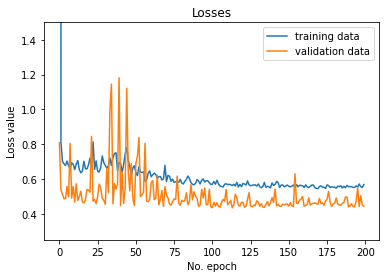

In [14]:
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.ylim([0.25, 1.5])
plt.title('Losses')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [10]:
loss = best_model.evaluate(val_features, val_labels)
print(loss)

loss = best_model.evaluate(test_features, test_labels)
print(loss)

16/16 [==============================] - 0s 515us/step - loss: 0.4308
0.43084242939949036
16/16 [==============================] - 0s 744us/step - loss: 0.5701
0.5700879096984863


In [15]:
predicted_test_labels = model.predict(test_features)
print(np.column_stack([predicted_test_labels, test_labels]))

[[5.72807741 6.        ]
 [5.5568881  6.        ]
 [5.95023108 6.        ]
 [5.20695877 5.        ]
 [6.16587162 8.        ]
 [5.00855541 5.        ]
 [6.77521086 7.        ]
 [5.6531806  5.        ]
 [5.48624516 5.        ]
 [5.50818825 6.        ]
 [5.8335371  5.        ]
 [5.81398344 7.        ]
 [5.81398344 7.        ]
 [5.82704592 6.        ]
 [6.3955698  7.        ]
 [6.56682968 7.        ]
 [5.73103666 5.        ]
 [6.20554399 5.        ]
 [5.21348429 5.        ]
 [5.4628396  5.        ]
 [5.5398469  5.        ]
 [5.29057837 4.        ]
 [5.32625628 6.        ]
 [6.05288982 5.        ]
 [6.24984598 7.        ]
 [5.60055065 6.        ]
 [6.72723389 8.        ]
 [5.59332418 5.        ]
 [5.77677679 5.        ]
 [5.51666546 6.        ]
 [5.46047163 5.        ]
 [5.97616577 5.        ]
 [5.66719627 6.        ]
 [6.45335722 7.        ]
 [5.46834326 5.        ]
 [6.48858833 6.        ]
 [6.48858833 6.        ]
 [5.29225206 5.        ]
 [5.70958376 5.        ]
 [6.70796156 8.        ]
